# OmniGibson Quickstart

## Imports

Note, the first thing to do is import required modules.

In [1]:
import os
import cv2
import yaml
from pprint import PrettyPrinter
import matplotlib.pyplot as plt
from IPython.display import Video

# When running in a notebook, you must set the following
os.environ["ISAAC_JUPYTER_KERNEL"] = "1"

# When run in a shell, this is the only required import
import omnigibson as og

# Pretty printing
pp = PrettyPrinter(indent=4)

INFO:root:Importing iGibson (igibson module)
INFO:root:Assets path: /home/michael/Documents/omnigibson_data/assets
INFO:root:Gibson Dataset path: /home/michael/Repositories/igibson3/igibson/data/g_dataset
INFO:root:iG Dataset path: /home/michael/Documents/omnigibson_data/ig_dataset
INFO:root:3D-FRONT Dataset path: /home/michael/Repositories/igibson3/igibson/data/threedfront_dataset
INFO:root:CubiCasa5K Dataset path: /home/michael/Repositories/igibson3/igibson/data/cubicasa_dataset
INFO:root:iGibson Key path: /home/michael/Repositories/igibson3/igibson/data/igibson.key
INFO:root:Example path: /home/michael/Repositories/igibson3/igibson/examples
INFO:root:Example config path: /home/michael/Repositories/igibson3/igibson/configs


Passing the following args to the base kit application:  ['-f', '/home/michael/.local/share/jupyter/runtime/kernel-c523bc18-113f-4b94-8a6d-f9a6b95c070b.json']
[Warning] [igibson.app_omni] Modules: ['omni.ext.impl.stat_cache', 'omni.ext.impl.ext_settings', 'omni.ext.impl.custom_importer'] were loaded before SimulationApp was started and might not be loaded correctly.
[Warning] [igibson.app_omni] Please check to make sure no extra omniverse or pxr modules are imported before the call to SimulationApp(...)
[Warning] [igibson.app_omni] Non-headless mode not supported with jupyter notebooks
[Warning] [omni.kit.app.plugin] No crash reporter present, dumps uploading isn't available.
[Info] [carb] Logging to file: /home/michael/.local/share/ov/pkg/isaac_sim-2022.1.1-release.1/kit/logs/Kit/iGibson/2022.1/kit_20221020_172219.log
2022-10-21 00:22:19 s] [Warning] [omni.ext.plugin] [ext: omni.drivesim.sensors.nv.lidar] Extensions config 'extension.toml' doesn't exist '/home/michael/.local/share/ov/

OmniAssetFileFormat


Warp initialized:
   Version: 0.2.2
   CUDA device: NVIDIA GeForce RTX 3090
   Kernel cache: /home/michael/.cache/warp/0.2.2
[1.246s] [ext: omni.kit.material.library-1.3.10] startup
[1.248s] [ext: omni.kit.menu.create-1.0.2] startup
[1.249s] [ext: omni.kit.window.file_importer-1.0.4] startup
[1.249s] [ext: omni.kit.window.file_exporter-1.0.4] startup
[1.250s] [ext: omni.kit.context_menu-1.3.9] startup
[1.252s] [ext: omni.kit.window.file-1.3.16] startup
[1.253s] [ext: omni.kit.widget.stage-2.6.15] startup
[1.255s] [ext: omni.kit.window.content_browser-2.4.28] startup
[1.262s] [ext: omni.rtx.window.settings-0.6.1] startup
[1.265s] [ext: omni.kit.window.property-1.6.3] startup
[1.266s] [ext: omni.kit.widget.layers-1.5.17] startup
[1.274s] [ext: omni.kit.profiler.window-1.4.4] startup
[1.277s] [ext: omni.rtx.settings.core-0.5.5] startup
[1.325s] [ext: omni.kit.property.usd-3.14.9] startup
[1.345s] [ext: omni.kit.property.layer-1.1.2] startup
[1.346s] [ext: omni.kit.usd_undo-0.1.0] startup


## Building a configuration file

In [2]:
config_name = "turtlebot_nav"
config_filename = os.path.join(og.example_config_path, f"{config_name}.yaml") 
config = yaml.load(open(config_filename, "r"), Loader=yaml.FullLoader)
pp.pprint(config)

{   'env': {   'initial_pos_z_offset': 0.1,
               'object_randomization_freq': None,
               'online_sampling': True,
               'texture_randomization_freq': None,
               'usd_file': None},
    'render': {'vertical_fov': 90, 'viewer_height': 720, 'viewer_width': 1280},
    'robots': [   {   'action_normalize': True,
                      'action_type': 'continuous',
                      'controller_config': {   'base': {   'name': 'DifferentialDriveController'}},
                      'obs_modalities': ['scan', 'rgb', 'depth'],
                      'rendering_params': None,
                      'scale': 1.0,
                      'self_collision': False,
                      'type': 'Turtlebot'}],
    'scene': {   'build_graph': True,
                 'include_robots': True,
                 'link_collision_tolerance': 0.03,
                 'load_object_categories': None,
                 'load_room_instances': None,
                 'load_room_types':

## Loading an environment

In [3]:
env = og.Environment(configs=config)

INFO:root:TraversableScene model: Rs_int
INFO:root:Scene name: Rs_int


{'waypoint_resolution': 0.2, 'num_waypoints': 1, 'build_graph': True, 'trav_map_resolution': 0.1, 'trav_map_erosion': 2, 'trav_map_with_objects': True, 'type': 'InteractiveTraversableScene', 'scene_model': 'Rs_int', 'texture_randomization': False, 'object_randomization': False, 'link_collision_tolerance': 0.03, 'predefined_object_randomization_idx': None, 'should_open_all_doors': True, 'load_object_categories': None, 'not_load_object_categories': None, 'load_room_types': None, 'load_room_instances': None, 'seg_map_resolution': 0.1, 'scene_source': 'IG', 'rendering_params': None, 'include_robots': True}
{'waypoint_resolution': 0.2, 'num_waypoints': 1, 'build_graph': True, 'trav_map_resolution': 0.1, 'trav_map_erosion': 2, 'trav_map_with_objects': True, 'type': 'InteractiveTraversableScene', 'scene_model': 'Rs_int', 'texture_randomization': False, 'object_randomization': False, 'link_collision_tolerance': 0.03, 'predefined_object_randomization_idx': None, 'should_open_all_doors': True, '

INFO:root:Clearing stage and loading scene USD: /home/michael/Documents/omnigibson_data/ig_dataset/scenes/Rs_int/usd/Rs_int_best_template.usd


Clearing system: WaterSystem
Clearing system: ClothSystem
Clearing system: DustSystem
Clearing system: StainSystem


INFO:root:Category: object
INFO:root:Loading the following primitive: Cube
INFO:root:Category: object
INFO:root:Loading the following USD: /home/michael/Documents/omnigibson_data/assets/models/stain/stain.usd


Initializing system: WaterSystem
Initializing system: ClothSystem
Initializing system: DustSystem
Initializing system: StainSystem


INFO:root:Category: walls
INFO:root:Loading the following USD: /home/michael/Documents/omnigibson_data/ig_dataset/objects/walls/Rs_int/usd/Rs_int.usd
INFO:root:Category: floors
INFO:root:Loading the following USD: /home/michael/Documents/omnigibson_data/ig_dataset/objects/floors/Rs_int/usd/Rs_int.usd
INFO:root:Category: ceilings
INFO:root:Loading the following USD: /home/michael/Documents/omnigibson_data/ig_dataset/objects/ceilings/Rs_int/usd/Rs_int.usd
INFO:root:Category: bottom_cabinet
INFO:root:Loading the following USD: /home/michael/Documents/omnigibson_data/ig_dataset/objects/bottom_cabinet/46380/usd/46380.usd
INFO:root:Category: pot_plant
INFO:root:Loading the following USD: /home/michael/Documents/omnigibson_data/ig_dataset/objects/pot_plant/2ccd2b095bd8ec27e2ec5524ed185c34/usd/2ccd2b095bd8ec27e2ec5524ed185c34.usd
INFO:root:Category: sofa
INFO:root:Loading the following USD: /home/michael/Documents/omnigibson_data/ig_dataset/objects/sofa/427c7655012b6cc5593ebeeedbff73b/usd/427c

mni.isaac.lula-1.1.0] startup
[3.096s] [ext: omni.kit.menu.edit-1.0.6] startup
[3.098s] [ext: omni.isaac.range_sensor-0.4.3] startup
[3.118s] [ext: omni.isaac.motion_planning-0.2.0] startup
[3.123s] [ext: omni.isaac.core_nodes-0.13.0] startup
[3.131s] [ext: omni.flowusd-0.1.0] startup
[3.141s] [ext: omni.kit.ui_test-1.2.2] startup
[3.150s] [ext: omni.kit.widget.searchfield-1.0.6] startup
[3.152s] [ext: omni.kit.widget.zoombar-1.0.3] startup
[3.152s] [ext: omni.kit.browser.core-2.0.12] startup
[3.156s] [ext: omni.isaac.synthetic_utils-0.3.5] startup
[3.159s] [ext: omni.isaac.motion_generation-3.6.1] startup
[3.162s] [ext: omni.isaac.isaac_sensor-1.0.2] startup
2022-10-21 00:22:22 [3,162ms] [Warning] [omni.physx.plugin] Deprecated: getSimulationEventStream is deprecated, please use getSimulationEventStreamV2
[3.170s] [ext: omni.kit.window.status_bar-0.1.1] startup
[3.174s] [ext: omni.isaac.utils-0.1.11] startup
[3.177s] [ext: omni.kit.widget.stage_icons-1.0.2] startup
[3.178s] [ext: omni

2022-10-21 00:23:05 [46,259ms] [Warning] [omni.isaac.dynamic_control.plugin] Failed to find articulation at '/World/breakfast_table_18'
2022-10-21 00:23:05 [46,261ms] [Warning] [omni.isaac.dynamic_control.plugin] Failed to find articulation at '/World/shelf_19'
2022-10-21 00:23:05 [46,263ms] [Warning] [omni.isaac.dynamic_control.plugin] Failed to find articulation at '/World/shelf_20'
2022-10-21 00:23:05 [46,264ms] [Warning] [omni.isaac.dynamic_control.plugin] Failed to find articulation at '/World/shelf_21'
2022-10-21 00:23:05 [46,270ms] [Warning] [omni.isaac.dynamic_control.plugin] Failed to find articulation at '/World/straight_chair_23'
2022-10-21 00:23:05 [46,271ms] [Warning] [omni.isaac.dynamic_control.plugin] Failed to find articulation at '/World/straight_chair_24'
2022-10-21 00:23:05 [46,274ms] [Warning] [omni.isaac.dynamic_control.plugin] Failed to find articulation at '/World/trash_can_25'
2022-10-21 00:23:05 [46,295ms] [Warning] [omni.usd._impl.utils] Path Sphere is auto-co

2022-10-21 00:23:05 [46,656ms] [Warning] [carb.flatcache.plugin] Type tag does not have a corresponding USD type


INFO:root:Category: agent
INFO:root:Loading the following USD: /home/michael/Documents/omnigibson_data/assets/models/turtlebot/turtlebot/turtlebot.usd
INFO:root:Control frequency is None - being set to default of 1 / render_timestep: 10.0000
INFO:root:Category: object
INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_action_normalize', '_action_type', '_actions_to_control', '_applied_visual_material', '_binding_api', '_build_obs_box_space', '_cls_registry', '_collision_filter_api', '_control_freq', '_controller_config', '_controllers', '_create_continuous_action_space', '_create_discrete_action_space', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_base_differential_drive_controller_config', '_default_base_joint_controller_config', '_default_base_null_joint_controller_config', '_default_controller_config', '_default_controllers', '_default_joints_state', '_default_

INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

INFO:root:Category: object
INFO:root:Loading the following primitive: Cylinder


dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

dir: ['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abilities', '_applied_visual_material', '_binding_api', '_col_geom', '_collision_filter_api', '_create_emitter_apis', '_create_prim_with_same_kwargs', '_dc', '_default_joints_state', '_default_state', '_denormalize_efforts', '_denormalize_positions', '_denormalize_velocities', '_deserialize', '_dofs_infos', '_dump_state', '_emitters', '_extents', '_get_local_pose_when_simulating', '_handle', '_highlight_cached_values', '_highlighted', '_init_info', '_initialize', '_initialized', '_joints', '_links', '_load', '_load_config', '_load_state', '_loaded', '_material', '_n_dof', '_n_duplicates', '_n

/home/michael/.local/mambaforge/envs/ig3/lib/python3.7/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


2022-10-21 00:23:15 [56,112ms] [Warning] [omni.syntheticdata.plugin] SdRenderVarToRawArray missing valid input renderVar LdrColorSD
2022-10-21 00:23:16 [56,815ms] [Warning] [omni.isaac.dynamic_control.plugin] Failed to find articulation at '/World/task_initial_pos_marker'
2022-10-21 00:23:16 [56,816ms] [Warning] [omni.isaac.dynamic_control.plugin] Failed to find articulation at '/World/task_goal_pos_marker'
2022-10-21 00:23:16 [56,817ms] [Warning] [omni.isaac.dynamic_control.plugin] Failed to find articulation at '/World/task_waypoint_marker0'
2022-10-21 00:23:16 [56,818ms] [Warning] [omni.isaac.dynamic_control.plugin] Failed to find articulation at '/World/task_waypoint_marker1'
2022-10-21 00:23:16 [56,819ms] [Warning] [omni.isaac.dynamic_control.plugin] Failed to find articulation at '/World/task_waypoint_marker2'
2022-10-21 00:23:16 [56,820ms] [Warning] [omni.isaac.dynamic_control.plugin] Failed to find articulation at '/World/task_waypoint_marker3'
2022-10-21 00:23:16 [56,820ms] [W

2022-10-21 00:23:16 [57,135ms] [Warning] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplifixation) cannot be a part of a dynamic body, falling back to convexHull approximation: /World/DustSystem/dust_template/base_link/collision
2022-10-21 00:23:16 [57,474ms] [Warning] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplifixation) cannot be a part of a dynamic body, falling back to convexHull approximation: /World/task_initial_pos_marker/base_link/collision
2022-10-21 00:23:16 [57,474ms] [Warning] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplifixation) cannot be a part of a dynamic body, falling back to convexHull approximation: /World/task_goal_pos_marker/base_link/collision
2022-10-21 00:23:16 [57,474ms] [Warning] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplifixat

INFO:root:Sampled initial pose: [ 0.9 -2.9  0. ], [0.         0.         0.07851209 0.99691316]
INFO:root:Sampled goal position: [-0.9 -0.6  0. ]
INFO:root:Sampled initial pose: [-1.1 -3.4  0. ], [ 0.          0.          0.99973489 -0.02302497]
INFO:root:Sampled goal position: [-0.9 -1.8  0. ]
INFO:root:Sampled initial pose: [ 0.2 -0.6  0. ], [ 0.          0.          0.80971686 -0.58682076]
INFO:root:Sampled goal position: [ 0.5 -2.1  0. ]


registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'breakfast_table_9', 'top_cab

INFO:root:Sampled initial pose: [0.4 1.3 0. ], [ 0.          0.          0.03767281 -0.99929013]
INFO:root:Sampled goal position: [-0.5  0.8  0. ]
INFO:root:Sampled initial pose: [ 1.  -0.5  0. ], [ 0.          0.          0.442841   -0.89660016]
INFO:root:Sampled goal position: [ 0.9 -3.4  0. ]
INFO:root:Sampled initial pose: [-0.1 -1.9  0. ], [ 0.          0.          0.11143752 -0.99377144]
INFO:root:Sampled goal position: [ 1.3 -0.6  0. ]


obj: robot_registry, state size: 23, passing in state length: 23
obj: robot0, state size: 23, passing in state length: 23
robot0
23
robot0
23
system_registry
WaterSystem
1
ClothSystem
1
DustSystem
123
StainSystem
117
242
object_registry
walls
13
floors
17
ceilings
13
bottom_cabinet_0
37
pot_plant_1
14
sofa_2
17
floor_lamp_3
19
stool_4
17
coffee_table_5
17
pot_plant_6
14
laptop_7
24
bottom_cabinet_8
37
breakfast_table_9
17
straight_chair_10
17
straight_chair_11
17
straight_chair_12
17
bottom_cabinet_13
47
pot_plant_14
14
standing_tv_15
24
loudspeaker_16
17
swivel_chair_17
22
breakfast_table_18
17
shelf_19
17
shelf_20
17
shelf_21
17
table_lamp_22
22
straight_chair_23
17
straight_chair_24
17
trash_can_25
17
countertop_26
17
carpet_27
17
bed_28
17
picture_29
15
toilet_30
27
shower_31
15
towel_rack_32
17
towel_rack_33
17
carpet_34
17
sink_35
19
mirror_36
17
picture_37
15
picture_38
15
bottom_cabinet_39
37
fridge_40
27
bottom_cabinet_41
37
sink_42
19
microwave_43
119
dishwasher_44
24
oven_45

INFO:root:Sampled initial pose: [1.2 1.6 0. ], [ 0.          0.          0.95881234 -0.28404032]
INFO:root:Sampled goal position: [-0.8 -2.   0. ]
INFO:root:Sampled initial pose: [-0.8  0.2  0. ], [ 0.          0.          0.66727219 -0.74481396]
INFO:root:Sampled goal position: [ 0.8 -1.2  0. ]
INFO:root:Sampled initial pose: [0.9 0.7 0. ], [0.         0.         0.09398341 0.99557376]
INFO:root:Sampled goal position: [ 0.7 -2.7  0. ]


registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'breakfast_table_9', 'top_cab

INFO:root:Sampled initial pose: [-3.2  1.2  0. ], [ 0.          0.          0.86703439 -0.49824829]
INFO:root:Sampled goal position: [0.2 0.4 0. ]
INFO:root:Sampled initial pose: [-1.9  1.3  0. ], [0.         0.         0.82642894 0.56304104]
INFO:root:Sampled goal position: [0.6 1.  0. ]
INFO:root:Sampled initial pose: [-1.2 -2.8  0. ], [0.         0.         0.62075197 0.78400701]
INFO:root:Sampled goal position: [1.1 1.5 0. ]


registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'breakfast_table_9', 'top_cab

INFO:root:Sampled initial pose: [-2.7  1.1  0. ], [ 0.          0.          0.93126562 -0.36434098]
INFO:root:Sampled goal position: [ 0.8 -1.5  0. ]
INFO:root:Sampled initial pose: [ 0.7 -0.9  0. ], [0.         0.         0.27606018 0.96114035]
INFO:root:Sampled goal position: [-0.7 -0.1  0. ]
INFO:root:Sampled initial pose: [0.9 1.3 0. ], [0.         0.         0.9690936  0.24669332]
INFO:root:Sampled goal position: [ 1.1 -2.9  0. ]


123
StainSystem
117
242
object_registry
walls
13
floors
17
ceilings
13
bottom_cabinet_0
37
pot_plant_1
14
sofa_2
17
floor_lamp_3
19
stool_4
17
coffee_table_5
17
pot_plant_6
14
laptop_7
24
bottom_cabinet_8
37
breakfast_table_9
17
straight_chair_10
17
straight_chair_11
17
straight_chair_12
17
bottom_cabinet_13
47
pot_plant_14
14
standing_tv_15
24
loudspeaker_16
17
swivel_chair_17
22
breakfast_table_18
17
shelf_19
17
shelf_20
17
shelf_21
17
table_lamp_22
22
straight_chair_23
17
straight_chair_24
17
trash_can_25
17
countertop_26
17
carpet_27
17
bed_28
17
picture_29
15
toilet_30
27
shower_31
15
towel_rack_32
17
towel_rack_33
17
carpet_34
17
sink_35
19
mirror_36
17
picture_37
15
picture_38
15
bottom_cabinet_39
37
fridge_40
27
bottom_cabinet_41
37
sink_42
19
microwave_43
119
dishwasher_44
24
oven_45
44
bottom_cabinet_46
37
top_cabinet_47
22
top_cabinet_48
22
top_cabinet_49
22
top_cabinet_50
22
top_cabinet_51
22
door_52
27
window_53
27
door_54
27
window_55
27
window_56
27
window_57
27
task_ini

INFO:root:Sampled initial pose: [-1.3 -2.8  0. ], [ 0.          0.          0.85311931 -0.52171587]
INFO:root:Sampled goal position: [1.  0.9 0. ]
INFO:root:Sampled initial pose: [ 0.5 -2.5  0. ], [ 0.          0.          0.90338415 -0.42883222]
INFO:root:Sampled goal position: [1.2 3.3 0. ]


registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'breakfast_table_9', 'top_cab

INFO:root:Sampled initial pose: [-0.2 -0.3  0. ], [ 0.          0.          0.99921182 -0.03969569]
INFO:root:Sampled goal position: [-0.8 -2.   0. ]
INFO:root:Sampled initial pose: [-1.9  0.9  0. ], [ 0.          0.          0.97011646 -0.24263976]
INFO:root:Sampled goal position: [0.1 0.5 0. ]


registry: robot_registry
system_registry
WaterSystem
1
ClothSystem
1
DustSystem
123
StainSystem
117
242
object_registry
walls
13
floors
17
ceilings
13
bottom_cabinet_0
37
pot_plant_1
14
sofa_2
17
floor_lamp_3
19
stool_4
17
coffee_table_5
17
pot_plant_6
14
laptop_7
24
bottom_cabinet_8
37
breakfast_table_9
17
straight_chair_10
17
straight_chair_11
17
straight_chair_12
17
bottom_cabinet_13
47
pot_plant_14
14
standing_tv_15
24
loudspeaker_16
17
swivel_chair_17
22
breakfast_table_18
17
shelf_19
17
shelf_20
17
shelf_21
17
table_lamp_22
22
straight_chair_23
17
straight_chair_24
17
trash_can_25
17
countertop_26
17
carpet_27
17
bed_28
17
picture_29
15
toilet_30
27
shower_31
15
towel_rack_32
17
towel_rack_33
17
carpet_34
17
sink_35
19
mirror_36
17
picture_37
15
picture_38
15
bottom_cabinet_39
37
fridge_40
27
bottom_cabinet_41
37
sink_42
19
microwave_43
119
dishwasher_44
24
oven_45
44
bottom_cabinet_46
37
top_cabinet_47
22
top_cabinet_48
22
top_cabinet_49
22
top_cabinet_50
22
top_cabinet_51
22
do

INFO:root:Sampled initial pose: [ 0.2 -2.6  0. ], [0.         0.         0.93338961 0.35886464]
INFO:root:Sampled goal position: [-0.7  2.1  0. ]
INFO:root:Sampled initial pose: [-1.9  0.7  0. ], [0.         0.         0.64208072 0.76663704]
INFO:root:Sampled goal position: [-0.9 -3.1  0. ]
INFO:root:Sampled initial pose: [0.6 0.6 0. ], [0.         0.         0.74184686 0.67056934]
INFO:root:Sampled goal position: [ 0.1 -2.1  0. ]


registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'breakfast_table_9', 'top_cab

INFO:root:Sampled initial pose: [ 0.7 -1.4  0. ], [0.         0.         0.43513726 0.90036413]
INFO:root:Sampled goal position: [ 0.2 -3.1  0. ]
INFO:root:Sampled initial pose: [-1.8  0.4  0. ], [ 0.          0.          0.44991826 -0.89306974]
INFO:root:Sampled goal position: [ 1.7 -3.4  0. ]


registry: robot_registry
system_registry
WaterSystem
1
ClothSystem
1
DustSystem
123
StainSystem
117
242
object_registry
walls
13
floors
17
ceilings
13
bottom_cabinet_0
37
pot_plant_1
14
sofa_2
17
floor_lamp_3
19
stool_4
17
coffee_table_5
17
pot_plant_6
14
laptop_7
24
bottom_cabinet_8
37
breakfast_table_9
17
straight_chair_10
17
straight_chair_11
17
straight_chair_12
17
bottom_cabinet_13
47
pot_plant_14
14
standing_tv_15
24
loudspeaker_16
17
swivel_chair_17
22
breakfast_table_18
17
shelf_19
17
shelf_20
17
shelf_21
17
table_lamp_22
22
straight_chair_23
17
straight_chair_24
17
trash_can_25
17
countertop_26
17
carpet_27
17
bed_28
17
picture_29
15
toilet_30
27
shower_31
15
towel_rack_32
17
towel_rack_33
17
carpet_34
17
sink_35
19
mirror_36
17
picture_37
15
picture_38
15
bottom_cabinet_39
37
fridge_40
27
bottom_cabinet_41
37
sink_42
19
microwave_43
119
dishwasher_44
24
oven_45
44
bottom_cabinet_46
37
top_cabinet_47
22
top_cabinet_48
22
top_cabinet_49
22
top_cabinet_50
22
top_cabinet_51
22
do

INFO:root:Sampled initial pose: [ 0.8 -1.5  0. ], [0.         0.         0.40115291 0.91601111]
INFO:root:Sampled goal position: [-3.5  0.7  0. ]
INFO:root:Sampled initial pose: [-3.3  0.9  0. ], [ 0.          0.          0.51473672 -0.8573483 ]
INFO:root:Sampled goal position: [ 0.7 -1.6  0. ]
INFO:root:Sampled initial pose: [-1.   2.5  0. ], [0.         0.         0.50673501 0.86210187]
INFO:root:Sampled goal position: [0.9 0.  0. ]


registry: robot_registry
registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'bre

INFO:root:Sampled initial pose: [-1.  -0.7  0. ], [0.         0.         0.22572697 0.97419061]
INFO:root:Sampled goal position: [-0.7  2.4  0. ]
INFO:root:Sampled initial pose: [ 0.7 -3.3  0. ], [0.         0.         0.46298854 0.88636427]
INFO:root:Sampled goal position: [ 0.1 -0.9  0. ]


registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'breakfast_table_9', 'top_cab

INFO:root:Sampled initial pose: [-1.  -2.9  0. ], [0.         0.         0.63643571 0.77132975]
INFO:root:Sampled goal position: [1.1 2.9 0. ]
INFO:root:Sampled initial pose: [-0.6 -1.9  0. ], [ 0.          0.          0.90207115 -0.43158734]
INFO:root:Sampled goal position: [-1.4  0.1  0. ]


registry: robot_registry
system_registry
WaterSystem
1
ClothSystem
1
DustSystem
123
StainSystem
117
242
object_registry
walls
13
floors
17
ceilings
13
bottom_cabinet_0
37
pot_plant_1
14
sofa_2
17
floor_lamp_3
19
stool_4
17
coffee_table_5
17
pot_plant_6
14
laptop_7
24
bottom_cabinet_8
37
breakfast_table_9
17
straight_chair_10
17
straight_chair_11
17
straight_chair_12
17
bottom_cabinet_13
47
pot_plant_14
14
standing_tv_15
24
loudspeaker_16
17
swivel_chair_17
22
breakfast_table_18
17
shelf_19
17
shelf_20
17
shelf_21
17
table_lamp_22
22
straight_chair_23
17
straight_chair_24
17
trash_can_25
17
countertop_26
17
carpet_27
17
bed_28
17
picture_29
15
toilet_30
27
shower_31
15
towel_rack_32
17
towel_rack_33
17
carpet_34
17
sink_35
19
mirror_36
17
picture_37
15
picture_38
15
bottom_cabinet_39
37
fridge_40
27
bottom_cabinet_41
37
sink_42
19
microwave_43
119
dishwasher_44
24
oven_45
44
bottom_cabinet_46
37
top_cabinet_47
22
top_cabinet_48
22
top_cabinet_49
22
top_cabinet_50
22
top_cabinet_51
22
do

INFO:root:Sampled initial pose: [ 0.4 -2.2  0. ], [ 0.          0.          0.99397342 -0.10962139]
INFO:root:Sampled goal position: [ 1.1 -3.3  0. ]
INFO:root:Sampled initial pose: [1.7 3.3 0. ], [ 0.          0.          0.30283442 -0.95304318]
INFO:root:Sampled goal position: [ 0.9 -3.4  0. ]


Syncing ClothSystem particles with 0 instancers..
common: set()
del: set()
create: set()
total state size: 2028
obj: DustSystem, state size: 123, passing in state length: 2027
Syncing DustSystem particles with 55 groups..
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'brea

INFO:root:Sampled initial pose: [ 1.7 -2.5  0. ], [0.         0.         0.57887169 0.81541865]
INFO:root:Sampled goal position: [1.1 1.6 0. ]
INFO:root:Sampled initial pose: [-0.9 -1.6  0. ], [0.         0.         0.5946073  0.80401627]
INFO:root:Sampled goal position: [-2.7  0.4  0. ]
INFO:root:Sampled initial pose: [1.1 2.  0. ], [ 0.          0.          0.19279749 -0.98123857]
INFO:root:Sampled goal position: [0.7 1.1 0. ]


registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'breakfast_table_9', 'top_cab

INFO:root:Sampled initial pose: [0.2 0.6 0. ], [0.         0.         0.99973842 0.0228712 ]
INFO:root:Sampled goal position: [1.  2.7 0. ]
INFO:root:Sampled initial pose: [-3.1  0.6  0. ], [ 0.          0.          0.73861503 -0.67412746]
INFO:root:Sampled goal position: [-1.8  0.8  0. ]
INFO:root:Sampled initial pose: [ 1.7 -3.1  0. ], [0.         0.         0.60376965 0.79715883]
INFO:root:Sampled goal position: [-1.6  0.2  0. ]


117
walls
13
floors
17
ceilings
13
bottom_cabinet_0
37
pot_plant_1
14
sofa_2
17
floor_lamp_3
19
stool_4
17
coffee_table_5
17
pot_plant_6
14
laptop_7
24
bottom_cabinet_8
37
breakfast_table_9
17
straight_chair_10
17
straight_chair_11
17
straight_chair_12
17
bottom_cabinet_13
47
pot_plant_14
14
standing_tv_15
24
loudspeaker_16
17
swivel_chair_17
22
breakfast_table_18
17
shelf_19
17
shelf_20
17
shelf_21
17
table_lamp_22
22
straight_chair_23
17
straight_chair_24
17
trash_can_25
17
countertop_26
17
carpet_27
17
bed_28
17
picture_29
15
toilet_30
27
shower_31
15
towel_rack_32
17
towel_rack_33
17
carpet_34
17
sink_35
19
mirror_36
17
picture_37
15
picture_38
15
bottom_cabinet_39
37
fridge_40
27
bottom_cabinet_41
37
sink_42
19
microwave_43
119
dishwasher_44
24
oven_45
44
bottom_cabinet_46
37
top_cabinet_47
22
top_cabinet_48
22
top_cabinet_49
22
top_cabinet_50
22
top_cabinet_51
22
door_52
27
window_53
27
door_54
27
window_55
27
window_56
27
window_57
27
task_initial_pos_marker
13
task_goal_pos_mar

INFO:root:Sampled initial pose: [-2.   0.7  0. ], [ 0.          0.          0.72890605 -0.68461374]
INFO:root:Sampled goal position: [-0.2 -3.3  0. ]
INFO:root:Sampled initial pose: [-1.7  0.3  0. ], [0.         0.         0.58113293 0.81380865]
INFO:root:Sampled goal position: [-3.1  1.1  0. ]
INFO:root:Sampled initial pose: [ 0.4 -2.5  0. ], [ 0.          0.          0.47297209 -0.88107741]
INFO:root:Sampled goal position: [-0.3  0.6  0. ]


117
242
object_registry
walls
13
floors
17
ceilings
13
bottom_cabinet_0
37
pot_plant_1
14
sofa_2
17
floor_lamp_3
19
stool_4
17
coffee_table_5
17
pot_plant_6
14
laptop_7
24
bottom_cabinet_8
37
breakfast_table_9
17
straight_chair_10
17
straight_chair_11
17
straight_chair_12
17
bottom_cabinet_13
47
pot_plant_14
14
standing_tv_15
24
loudspeaker_16
17
swivel_chair_17
22
breakfast_table_18
17
shelf_19
17
shelf_20
17
shelf_21
17
table_lamp_22
22
straight_chair_23
17
straight_chair_24
17
trash_can_25
17
countertop_26
17
carpet_27
17
bed_28
17
picture_29
15
toilet_30
27
shower_31
15
towel_rack_32
17
towel_rack_33
17
carpet_34
17
sink_35
19
mirror_36
17
picture_37
15
picture_38
15
bottom_cabinet_39
37
fridge_40
27
bottom_cabinet_41
37
sink_42
19
microwave_43
119
dishwasher_44
24
oven_45
44
bottom_cabinet_46
37
top_cabinet_47
22
top_cabinet_48
22
top_cabinet_49
22
top_cabinet_50
22
top_cabinet_51
22
door_52
27
window_53
27
door_54
27
window_55
27
window_56
27
window_57
27
task_initial_pos_marker


INFO:root:Sampled initial pose: [ 1.  -0.2  0. ], [0.        0.        0.9830185 0.1835065]
INFO:root:Sampled goal position: [-0.3  0.8  0. ]
INFO:root:Sampled initial pose: [0.8 2.6 0. ], [0.         0.         0.95862364 0.28467653]
INFO:root:Sampled goal position: [-2.7  0.7  0. ]


242
object_registry
walls
13
floors
17
ceilings
13
bottom_cabinet_0
37
pot_plant_1
14
sofa_2
17
floor_lamp_3
19
stool_4
17
coffee_table_5
17
pot_plant_6
14
laptop_7
24
bottom_cabinet_8
37
breakfast_table_9
17
straight_chair_10
17
straight_chair_11
17
straight_chair_12
17
bottom_cabinet_13
47
pot_plant_14
14
standing_tv_15
24
loudspeaker_16
17
swivel_chair_17
22
breakfast_table_18
17
shelf_19
17
shelf_20
17
shelf_21
17
table_lamp_22
22
straight_chair_23
17
straight_chair_24
17
trash_can_25
17
countertop_26
17
carpet_27
17
bed_28
17
picture_29
15
toilet_30
27
shower_31
15
towel_rack_32
17
towel_rack_33
17
carpet_34
17
sink_35
19
mirror_36
17
picture_37
15
picture_38
15
bottom_cabinet_39
37
fridge_40
27
bottom_cabinet_41
37
sink_42
19
microwave_43
119
dishwasher_44
24
oven_45
44
bottom_cabinet_46
37
top_cabinet_47
22
top_cabinet_48
22
top_cabinet_49
22
top_cabinet_50
22
top_cabinet_51
22
door_52
27
window_53
27
door_54
27
window_55
27
window_56
27
window_57
27
task_initial_pos_marker
13
t

INFO:root:Sampled initial pose: [-2.7  1.1  0. ], [0.         0.         0.43010418 0.90277926]
INFO:root:Sampled goal position: [-0.3  2.6  0. ]
INFO:root:Sampled initial pose: [ 1.1 -1.2  0. ], [ 0.          0.          0.70328595 -0.71090708]
INFO:root:Sampled goal position: [-0.9 -1.3  0. ]
INFO:root:Sampled initial pose: [1.8 3.3 0. ], [0.         0.         0.76758521 0.64094691]
INFO:root:Sampled goal position: [ 0.2 -1.7  0. ]


registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'breakfast_table_9', 'top_cab

INFO:root:Sampled initial pose: [ 0.  -3.1  0. ], [ 0.          0.          0.30384508 -0.95272145]
INFO:root:Sampled goal position: [-0.2  2.2  0. ]
INFO:root:Sampled initial pose: [-0.9  1.   0. ], [0.         0.         0.11968841 0.99281151]
INFO:root:Sampled goal position: [-0.1  2.3  0. ]


117
242
object_registry
walls
13
floors
17
ceilings
13
bottom_cabinet_0
37
pot_plant_1
14
sofa_2
17
floor_lamp_3
19
stool_4
17
coffee_table_5
17
pot_plant_6
14
laptop_7
24
bottom_cabinet_8
37
breakfast_table_9
17
straight_chair_10
17
straight_chair_11
17
straight_chair_12
17
bottom_cabinet_13
47
pot_plant_14
14
standing_tv_15
24
loudspeaker_16
17
swivel_chair_17
22
breakfast_table_18
17
shelf_19
17
shelf_20
17
shelf_21
17
table_lamp_22
22
straight_chair_23
17
straight_chair_24
17
trash_can_25
17
countertop_26
17
carpet_27
17
bed_28
17
picture_29
15
toilet_30
27
shower_31
15
towel_rack_32
17
towel_rack_33
17
carpet_34
17
sink_35
19
mirror_36
17
picture_37
15
picture_38
15
bottom_cabinet_39
37
fridge_40
27
bottom_cabinet_41
37
sink_42
19
microwave_43
119
dishwasher_44
24
oven_45
44
bottom_cabinet_46
37
top_cabinet_47
22
top_cabinet_48
22
top_cabinet_49
22
top_cabinet_50
22
top_cabinet_51
22
door_52
27
window_53
27
door_54
27
window_55
27
window_56
27
window_57
27
task_initial_pos_marker


INFO:root:Sampled initial pose: [-0.7 -3.2  0. ], [0.         0.         0.01123622 0.99993687]
INFO:root:Sampled goal position: [ 0.6 -1.5  0. ]
INFO:root:Sampled initial pose: [ 0.7 -1.9  0. ], [0.         0.         0.94605397 0.32400909]
INFO:root:Sampled goal position: [ 0.1 -0.7  0. ]
INFO:root:Sampled initial pose: [ 1.7 -2.6  0. ], [ 0.          0.          0.83313291 -0.55307283]
INFO:root:Sampled goal position: [ 0.  -0.6  0. ]


registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'breakfast_table_9', 'top_cab

INFO:root:Sampled initial pose: [-3.6  0.5  0. ], [ 0.          0.          0.96732785 -0.25352874]
INFO:root:Sampled goal position: [ 0.4 -2.4  0. ]
INFO:root:Sampled initial pose: [-0.1 -1.   0. ], [0.         0.         0.78385884 0.62093907]
INFO:root:Sampled goal position: [-1.1  0.8  0. ]
INFO:root:Sampled initial pose: [0.2 0.5 0. ], [ 0.          0.          0.81164493 -0.5841511 ]
INFO:root:Sampled goal position: [1.  1.9 0. ]


registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'breakfast_table_9', 'top_cab

INFO:root:Sampled initial pose: [0.6 1.1 0. ], [ 0.          0.          0.61028559 -0.79218148]
INFO:root:Sampled goal position: [0.7 2.6 0. ]
INFO:root:Sampled initial pose: [ 1.6 -2.8  0. ], [ 0.          0.          0.97855545 -0.20598356]
INFO:root:Sampled goal position: [-1.3 -3.   0. ]
INFO:root:Sampled initial pose: [-1.1 -3.3  0. ], [ 0.          0.          0.83031162 -0.5572994 ]
INFO:root:Sampled goal position: [ 0.5 -2.5  0. ]


registry: robot_registry
registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'bre

INFO:root:Sampled initial pose: [1.  3.2 0. ], [ 0.          0.          0.42941656 -0.90310654]
INFO:root:Sampled goal position: [ 0.2 -1.8  0. ]
INFO:root:Sampled initial pose: [-3.5  0.9  0. ], [0.         0.         0.34561675 0.93837576]
INFO:root:Sampled goal position: [ 0.2 -2.4  0. ]


robot0
23
robot0
23
system_registry
WaterSystem
1
ClothSystem
1
DustSystem
123
StainSystem
117
242
object_registry
walls
13
floors
17
ceilings
13
bottom_cabinet_0
37
pot_plant_1
14
sofa_2
17
floor_lamp_3
19
stool_4
17
coffee_table_5
17
pot_plant_6
14
laptop_7
24
bottom_cabinet_8
37
breakfast_table_9
17
straight_chair_10
17
straight_chair_11
17
straight_chair_12
17
bottom_cabinet_13
47
pot_plant_14
14
standing_tv_15
24
loudspeaker_16
17
swivel_chair_17
22
breakfast_table_18
17
shelf_19
17
shelf_20
17
shelf_21
17
table_lamp_22
22
straight_chair_23
17
straight_chair_24
17
trash_can_25
17
countertop_26
17
carpet_27
17
bed_28
17
picture_29
15
toilet_30
27
shower_31
15
towel_rack_32
17
towel_rack_33
17
carpet_34
17
sink_35
19
mirror_36
17
picture_37
15
picture_38
15
bottom_cabinet_39
37
fridge_40
27
bottom_cabinet_41
37
sink_42
19
microwave_43
119
dishwasher_44
24
oven_45
44
bottom_cabinet_46
37
top_cabinet_47
22
top_cabinet_48
22
top_cabinet_49
22
top_cabinet_50
22
top_cabinet_51
22
door_52

INFO:root:Sampled initial pose: [ 1.5 -3.4  0. ], [ 0.          0.          0.26204712 -0.96505508]
INFO:root:Sampled goal position: [-1.6 -2.8  0. ]
INFO:root:Sampled initial pose: [-2.8  0.8  0. ], [ 0.          0.          0.99298485 -0.11824163]
INFO:root:Sampled goal position: [-1.6 -2.9  0. ]
INFO:root:Sampled initial pose: [ 0.3 -3.   0. ], [0.         0.         0.12562585 0.99207769]
INFO:root:Sampled goal position: [-0.6 -3.5  0. ]


registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'breakfast_table_9', 'top_cab

INFO:root:Sampled initial pose: [-0.1 -1.5  0. ], [0.         0.         0.99876319 0.04972021]
INFO:root:Sampled goal position: [ 0.7 -0.2  0. ]
INFO:root:Sampled initial pose: [-0.6  2.1  0. ], [0.         0.         0.68731006 0.72636415]
INFO:root:Sampled goal position: [-0.9 -0.3  0. ]
INFO:root:Sampled initial pose: [ 1.2 -3.1  0. ], [0.         0.         0.19109529 0.98157149]
INFO:root:Sampled goal position: [ 0.4 -1.1  0. ]


registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'breakfast_table_9', 'top_cab

INFO:root:Sampled initial pose: [-1.6  1.   0. ], [0.         0.         0.17750708 0.98411952]
INFO:root:Sampled goal position: [-0.7  2.6  0. ]
INFO:root:Sampled initial pose: [ 0.9 -1.5  0. ], [ 0.          0.          0.72627578 -0.68740345]
INFO:root:Sampled goal position: [-3.4  0.8  0. ]


registry: robot_registry
registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'bre

INFO:root:Sampled initial pose: [-0.7  0.   0. ], [0.         0.         0.68949105 0.72429421]
INFO:root:Sampled goal position: [-1.4  2.7  0. ]
INFO:root:Sampled initial pose: [-0.9  2.7  0. ], [ 0.         0.         0.2321856 -0.9726715]
INFO:root:Sampled goal position: [0.6 2.4 0. ]
INFO:root:Sampled initial pose: [ 0.3 -0.4  0. ], [ 0.          0.          0.99641345 -0.08461819]
INFO:root:Sampled goal position: [-0.9  2.7  0. ]


registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'breakfast_table_9', 'top_cab

INFO:root:Sampled initial pose: [-1.5  0.   0. ], [ 0.          0.          0.56784249 -0.82313723]
INFO:root:Sampled goal position: [0.9 1.6 0. ]
INFO:root:Sampled initial pose: [1.1 2.4 0. ], [ 0.          0.          0.16943369 -0.98554159]
INFO:root:Sampled goal position: [1.8 3.3 0. ]


registry: object_registry
registry: robot_registry
registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table

INFO:root:Sampled initial pose: [0.1 2.2 0. ], [ 0.          0.          0.29720315 -0.95481427]
INFO:root:Sampled goal position: [ 0.9 -2.9  0. ]
INFO:root:Sampled initial pose: [0.1 2.2 0. ], [0.         0.         0.73507993 0.67798045]
INFO:root:Sampled goal position: [-1.2  2.7  0. ]
INFO:root:Sampled initial pose: [ 0.8 -2.   0. ], [0.         0.         0.10909724 0.99403108]
INFO:root:Sampled goal position: [1.1 1.5 0. ]


registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'breakfast_table_9', 'top_cab

INFO:root:Sampled initial pose: [ 1.5 -3.4  0. ], [0.         0.         0.99807245 0.06205948]
INFO:root:Sampled goal position: [0.6 0.2 0. ]
INFO:root:Sampled initial pose: [ 1.7 -2.8  0. ], [ 0.          0.          0.07848051 -0.99691565]
INFO:root:Sampled goal position: [ 0.5 -3.1  0. ]
INFO:root:Sampled initial pose: [ 0.3 -1.3  0. ], [ 0.          0.          0.70241757 -0.7117651 ]
INFO:root:Sampled goal position: [0.1 2.4 0. ]


13
task_waypoint_marker3
13
task_waypoint_marker4
13
task_waypoint_marker5
13
task_waypoint_marker6
13
task_waypoint_marker7
13
task_waypoint_marker8
13
task_waypoint_marker9
13
task_waypoint_marker10
13
task_waypoint_marker11
13
task_waypoint_marker12
13
task_waypoint_marker13
13
task_waypoint_marker14
13
task_waypoint_marker15
13
task_waypoint_marker16
13
task_waypoint_marker17
13
task_waypoint_marker18
13
task_waypoint_marker19
13
task_waypoint_marker20
13
task_waypoint_marker21
13
task_waypoint_marker22
13
task_waypoint_marker23
13
task_waypoint_marker24
13
1764
robot_registry
robot0
23
23
WaterSystem
1
ClothSystem
1
DustSystem
123
StainSystem
117
walls
13
floors
17
ceilings
13
bottom_cabinet_0
37
pot_plant_1
14
sofa_2
17
floor_lamp_3
19
stool_4
17
coffee_table_5
17
pot_plant_6
14
laptop_7
24
bottom_cabinet_8
37
breakfast_table_9
17
straight_chair_10
17
straight_chair_11
17
straight_chair_12
17
bottom_cabinet_13
47
pot_plant_14
14
standing_tv_15
24
loudspeaker_16
17
swivel_chair_17

INFO:root:Sampled initial pose: [1.1 2.  0. ], [ 0.          0.          0.96868175 -0.2483056 ]
INFO:root:Sampled goal position: [-2.6  1.3  0. ]
INFO:root:Sampled initial pose: [-0.6  2.3  0. ], [0.         0.         0.99686305 0.07914576]
INFO:root:Sampled goal position: [ 1.7 -3.3  0. ]
INFO:root:Sampled initial pose: [ 1.6 -0.5  0. ], [0.         0.         0.47432243 0.8803512 ]
INFO:root:Sampled goal position: [ 0.8 -3.3  0. ]


registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'breakfast_table_9', 'top_cab

INFO:root:Sampled initial pose: [-1.2  0.7  0. ], [0.         0.         0.58703268 0.80956323]
INFO:root:Sampled goal position: [ 1.2 -1.3  0. ]
INFO:root:Sampled initial pose: [0.5 2.6 0. ], [ 0.          0.          0.478178   -0.87826294]
INFO:root:Sampled goal position: [ 0.5 -0.7  0. ]


Syncing ClothSystem particles with 0 instancers..
common: set()
del: set()
create: set()
total state size: 2028
obj: DustSystem, state size: 123, passing in state length: 2027
Syncing DustSystem particles with 55 groups..
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'brea

INFO:root:Sampled initial pose: [0.  0.6 0. ], [0.         0.         0.43190724 0.90191803]
INFO:root:Sampled goal position: [-1.3  0.   0. ]
INFO:root:Sampled initial pose: [1.6 3.1 0. ], [0.         0.         0.86327538 0.50473321]
INFO:root:Sampled goal position: [ 0.9 -2.   0. ]


registry: robot_registry
registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'bre

INFO:root:Sampled initial pose: [-3.7  0.4  0. ], [ 0.          0.          0.28464118 -0.95863413]
INFO:root:Sampled goal position: [1.7 2.9 0. ]
INFO:root:Sampled initial pose: [ 1.1 -0.3  0. ], [0.        0.        0.7531654 0.6578312]
INFO:root:Sampled goal position: [0.9 3.1 0. ]
INFO:root:Sampled initial pose: [0.4 2.3 0. ], [ 0.          0.          0.99686749 -0.07908986]
INFO:root:Sampled goal position: [-0.9 -0.2  0. ]


registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'breakfast_table_9', 'top_cab

INFO:root:Sampled initial pose: [0.4 1.3 0. ], [0.         0.         0.99819103 0.06012219]
INFO:root:Sampled goal position: [-1.4  2.6  0. ]
INFO:root:Sampled initial pose: [0.5 0.  0. ], [ 0.          0.          0.24112541 -0.97049397]
INFO:root:Sampled goal position: [-0.3  0.9  0. ]
INFO:root:Sampled initial pose: [ 0.4 -1.7  0. ], [0.         0.         0.90569877 0.42392185]
INFO:root:Sampled goal position: [0.7 0.7 0. ]


registry: object_registry
registry: robot_registry
registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table

INFO:root:Sampled initial pose: [ 0.9 -0.9  0. ], [ 0.          0.          0.11763611 -0.99305677]
INFO:root:Sampled goal position: [0.5 0.6 0. ]
INFO:root:Sampled initial pose: [-1.1  2.4  0. ], [0.         0.         0.59880076 0.80089802]
INFO:root:Sampled goal position: [-2.9  1.4  0. ]
INFO:root:Sampled initial pose: [ 1.  -0.1  0. ], [ 0.          0.          0.58746608 -0.80924879]
INFO:root:Sampled goal position: [-1.3 -3.1  0. ]


registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'breakfast_table_9', 'top_cab

INFO:root:Sampled initial pose: [-0.9 -3.5  0. ], [ 0.          0.          0.73790576 -0.67490376]
INFO:root:Sampled goal position: [1.  2.3 0. ]
INFO:root:Sampled initial pose: [ 1.5 -3.1  0. ], [ 0.          0.          0.90166804 -0.43242889]
INFO:root:Sampled goal position: [-1.  -3.4  0. ]


242
object_registry
walls
13
floors
17
ceilings
13
bottom_cabinet_0
37
pot_plant_1
14
sofa_2
17
floor_lamp_3
19
stool_4
17
coffee_table_5
17
pot_plant_6
14
laptop_7
24
bottom_cabinet_8
37
breakfast_table_9
17
straight_chair_10
17
straight_chair_11
17
straight_chair_12
17
bottom_cabinet_13
47
pot_plant_14
14
standing_tv_15
24
loudspeaker_16
17
swivel_chair_17
22
breakfast_table_18
17
shelf_19
17
shelf_20
17
shelf_21
17
table_lamp_22
22
straight_chair_23
17
straight_chair_24
17
trash_can_25
17
countertop_26
17
carpet_27
17
bed_28
17
picture_29
15
toilet_30
27
shower_31
15
towel_rack_32
17
towel_rack_33
17
carpet_34
17
sink_35
19
mirror_36
17
picture_37
15
picture_38
15
bottom_cabinet_39
37
fridge_40
27
bottom_cabinet_41
37
sink_42
19
microwave_43
119
dishwasher_44
24
oven_45
44
bottom_cabinet_46
37
top_cabinet_47
22
top_cabinet_48
22
top_cabinet_49
22
top_cabinet_50
22
top_cabinet_51
22
door_52
27
window_53
27
door_54
27
window_55
27
window_56
27
window_57
27
task_initial_pos_marker
13
t

INFO:root:Sampled initial pose: [0.4 2.5 0. ], [0.         0.         0.77452778 0.6325399 ]
INFO:root:Sampled goal position: [ 1.8 -3.   0. ]
INFO:root:Sampled initial pose: [-0.9  2.   0. ], [0.         0.         0.40623263 0.91376969]
INFO:root:Sampled goal position: [-3.2  1.1  0. ]
INFO:root:Sampled initial pose: [-0.6 -3.2  0. ], [ 0.          0.          0.82797654 -0.56076273]
INFO:root:Sampled goal position: [ 1.7 -3.5  0. ]


registry: master_registry
registry: system_registry
common: set()
del: set()
create: set()
common: set()
del: set()
create: set()
common: {'picture_29', 'window_55', 'straight_chair_12', 'bottom_cabinet_46', 'straight_chair_10', 'top_cabinet_49', 'carpet_27', 'floors', 'dishwasher_44', 'sink_42', 'floor_lamp_3', 'toilet_30', 'bottom_cabinet_8', 'sink_35', 'laptop_7', 'shelf_20', 'table_lamp_22', 'bottom_cabinet_41', 'loudspeaker_16', 'mirror_36', 'microwave_43', 'window_56', 'trash_can_25', 'window_53', 'straight_chair_23', 'straight_chair_11', 'sofa_2', 'straight_chair_24', 'bottom_cabinet_39', 'top_cabinet_48', 'window_57', 'door_52', 'bottom_cabinet_13', 'stool_4', 'door_54', 'shelf_19', 'swivel_chair_17', 'picture_37', 'top_cabinet_51', 'picture_38', 'standing_tv_15', 'bed_28', 'fridge_40', 'towel_rack_33', 'carpet_34', 'towel_rack_32', 'shelf_21', 'top_cabinet_50', 'bottom_cabinet_0', 'breakfast_table_18', 'oven_45', 'coffee_table_5', 'countertop_26', 'breakfast_table_9', 'top_cab

walls
13
floors
17
ceilings
13
bottom_cabinet_0
37
pot_plant_1
14
sofa_2
17
floor_lamp_3
19
stool_4
17
coffee_table_5
17
pot_plant_6
14
laptop_7
24
bottom_cabinet_8
37
breakfast_table_9
17
straight_chair_10
17
straight_chair_11
17
straight_chair_12
17
bottom_cabinet_13
47
pot_plant_14
14
standing_tv_15
24
loudspeaker_16
17
swivel_chair_17
22
breakfast_table_18
17
shelf_19
17
shelf_20
17
shelf_21
17
table_lamp_22
22
straight_chair_23
17
straight_chair_24
17
trash_can_25
17
countertop_26
17
carpet_27
17
bed_28
17
picture_29
15
toilet_30
27
shower_31
15
towel_rack_32
17
towel_rack_33
17
carpet_34
17
sink_35
19
mirror_36
17
picture_37
15
picture_38
15
bottom_cabinet_39
37
fridge_40
27
bottom_cabinet_41
37
sink_42
19
microwave_43
119
dishwasher_44
24
oven_45
44
bottom_cabinet_46
37
top_cabinet_47
22
top_cabinet_48
22
top_cabinet_49
22
top_cabinet_50
22
top_cabinet_51
22
door_52
27
window_53
27
door_54
27
window_55
27
window_56
27
window_57
27
task_initial_pos_marker
13
task_goal_pos_marker


## Taking actions

In [4]:
for _ in range(100):
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

## Observation modalities

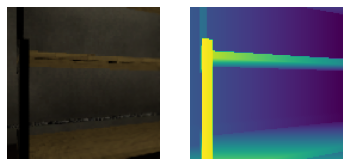

In [5]:
# Show the robot camera
fig, axs = plt.subplots(1, 2)
axs[0].imshow(state['robot0']['robot0:eyes_Camera_sensor_rgb'])
axs[1].imshow(state['robot0']['robot0:eyes_Camera_sensor_depth'])
axs[0].axis('off')
axs[1].axis('off')
plt.show()

## Generating a video of agent motion

In [ ]:
frame_size = state['robot0']['robot0:eyes_Camera_sensor_rgb'].shape
fourcc = cv2.VideoWriter_fourcc(*'avc1')
output_video = cv2.VideoWriter("video.mp4", fourcc, 20.0, frame_size[:2])

for i in range(100):
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    img = state['robot0']['robot0:eyes_Camera_sensor_rgb']
    output_video.write(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    
output_video.release()


Video("video.mp4", height=512, width=512)

Could not find encoder for codec id 27: Encoder not found
